# DyNet Intro

* **I. API**
* **II. E.G.1 -- XOR**
* **III. E.G.2 -- RNN**

## I. API

In [1]:
from dynet import *

import numpy as np

from __future__ import division

In [47]:
# Reset comp-graph
#   always a good practice before starting a session
renew_cg()

# Create data structures
x = scalarInput(2)
v = inputVector([1,2,3]) 
z = inputTensor(np.array([[1,2,3],[4,5,6]]))
print x.value()
print v.vec_value()
print z.value()
print z.npvalue() # eval as np.array

2.0
[1.0, 2.0, 3.0]
[[ 1.  2.  3.]
 [ 4.  5.  6.]]
[[ 1.  2.  3.]
 [ 4.  5.  6.]]


In [3]:
# Filling params and embedding lookup

renew_cg()

m = ParameterCollection()
pW = m.add_parameters((8,8))
pb = m.add_parameters(8)

W = parameter(pW)
b = parameter(pb)

vocab_size = 10
emb_size = 3
lp = m.add_lookup_parameters((vocab_size, emb_size))

e5 = lookup(lp, 5) # get embedding at row 5
e5c = lookup(lp, 5, update=False) # set as non-trainable
print 'row 5:', e5.value()
print 'row 5 (non-trainable):', e5c.value()
e5.set(9) # e5 expr. now has row 9
e5c.set(9) # same
print 'Reset to row 9 ...'
print 'row 5:', e5.value()
print 'row 5 (non-trainable):', e5c.value()

row 5: [0.12060943990945816, 0.6338164210319519, 0.41185712814331055]
row 5 (non-trainable): [0.12060943990945816, 0.6338164210319519, 0.41185712814331055]
Reset to row 9 ...
row 5: [-0.5574085116386414, 0.38705575466156006, 0.7486212253570557]
row 5 (non-trainable): [-0.5574085116386414, 0.38705575466156006, 0.7486212253570557]


In [57]:
# Basic operations

renew_cg() # CRUCIAL! OTHERWISE DEAD KERNEL

a_scalar = scalarInput(2)
b_scalar = scalarInput(3)
a_vec = inputVector([1,2,3])
b_vec = inputVector([3,4,5])

print 'Elementary ops'
print (a_scalar + b_scalar).value()
print dot_product(a_vec, b_vec).value()
print cmult(a_vec, b_vec).value() # Hadamard product
print cdiv(a_vec, b_vec).value() # Hadamard division (CRUCIAL: __future__.division required)
print sum_elems(a_vec).value()
# print colwise_add(a_vec, b_vec)  
print

print 'Reshape & Transpose'
c_vec = inputVector([1,2,3,4,5,6])
c_mat = reshape(c_vec, (2,3))
print c_mat.value()
print transpose(c_mat).value()
print 

print 'Activations'
print tanh(a_vec).value()
print exp(a_vec).value()
print log(a_vec).value()
print logistic(a_vec).value()
print rectify(a_vec).value()
print softsign(a_vec).value()
print softmax(a_vec).value()
print 

print 'Restricted ops to ids'
print log_softmax(a_vec,restrict=[0,2]).value()
print 

print 'Select vals by ids'
d_vec = inputVector(range(10))
print pick(d_vec, 3).value()
print d_vec[3].value()
print pickrange(d_vec, 3, 6).value()
print d_vec[3:6].value()
print pickneglogsoftmax(d_vec, 3).value() #  i.e. (pick(-log(softmax(e1)), k))
print 

print 'Regularization'
print noise(a_vec, 0.01).value() # add Gaussian noise with std=0.01
print dropout(a_vec, 0.5).value() # dropout with p=0.5, dropped vals=0
print 

print 'For-all ops'
print esum([a_vec, b_vec]).value() # Hadamard sum
print average([a_vec, b_vec]).value() # Hadamard avg.
print concatenate_cols([a_vec, b_vec]).value() # concat vecs as cols
print concatenate([a_vec, b_vec]).value() # long-list concat
print 

print 'Loss fns'
print squared_distance(a_vec, b_vec).value() # Euclidean dist.
print l1_distance(a_vec, b_vec).value() # Manhattan dist.
print huber_distance(a_vec, b_vec).value() # less sensitive to outliers like Euclidean
print binary_log_loss(logistic(a_scalar), logistic(b_scalar)).value() # b*log(a) + (1-b)*log(1-a)
print pairwise_rank_loss(a_scalar, b_scalar, m=1.0).value() 
print pairwise_rank_loss(transpose(a_vec), transpose(b_vec), m=1.0).value()

# For conv net support, better use Tensorflow.

Elementary ops
5.0
26.0
[3.0, 8.0, 15.0]
[0.3333333432674408, 0.5, 0.6000000238418579]
6.0

Reshape & Transpose
[[ 1.  3.  5.]
 [ 2.  4.  6.]]
[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]]

Activations
[0.7615941762924194, 0.9640275835990906, 0.9950547218322754]
[2.7182817459106445, 7.389056205749512, 20.08553695678711]
[0.0, 0.6931471824645996, 1.0986123085021973]
[0.7310585975646973, 0.8807970285415649, 0.9525741338729858]
[1.0, 2.0, 3.0]
[0.5, 0.6666666865348816, 0.75]
[0.09003058075904846, 0.24472849071025848, 0.665241003036499]

Restricted ops to ids
[-2.1269280910491943, -inf, -0.12692809104919434]

Select vals by ids
3.0
3.0
[3.0, 4.0, 5.0]
[3.0, 4.0, 5.0]
6.45862960815

Regularization
[0.9812455773353577, 2.005760669708252, 2.999218702316284]
[2.0, 0.0, 6.0]

For-all ops
[4.0, 6.0, 8.0]
[2.0, 3.0, 4.0]
[[ 1.  3.]
 [ 2.  4.]
 [ 3.  5.]]
[1.0, 2.0, 3.0, 3.0, 4.0, 5.0]

Loss fns
12.0
6.0
10.7129249573
0.2217797786
2.0
[[ 3.  3.  3.]]


In [34]:
# Simple MNIST logistic classifier
#   warning: slow, trying to figure out why it's so much slower than TF

from dynet import *

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
print "Train sizes", mnist.train.images.shape, mnist.train.labels.shape
print "Test sizes", mnist.test.images.shape, mnist.test.labels.shape

dp = DynetParams()
dp.set_autobatch(True)
dp.set_mem(2048)

renew_cg()

m = ParameterCollection()
pW = m.add_parameters((10, 784))
pb = m.add_parameters(10)

trainer = AdamTrainer(m)

W = parameter(pW)
b = parameter(pb)
x = inputVector(np.zeros(784))
def calculate_loss(X_i, y_i):
    x.set(X_i)
    pred = softmax((W*x)+b)
    loss = -log(pick(pred, np.argmax(y_i)))
    return loss
count = 0
num_epochs = 1
batch_size = 10
for _ in xrange(num_epochs):
    for _ in range(int(mnist.train.num_examples/batch_size)):
        count += 1
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        losses = []
        for X_i,y_i in zip(X_batch,y_batch):
            loss = calculate_loss(X_i,y_i)
            losses.append(loss)
        loss = esum(losses)
        if count % 500 == 0:
            print '... loss at', str(count)+':', loss.value()
        loss.forward()
        loss.backward()
        trainer.update()

... loss at 500: 24.1510372162
... loss at 1000: 24.6248283386
... loss at 1500: 23.3079299927
... loss at 2000: 25.1814155579
... loss at 2500: 23.0396842957
... loss at 3000: 20.3630332947
... loss at 3500: 23.7845077515
... loss at 4000: 23.2671813965
... loss at 4500: 22.9774723053
... loss at 5000: 23.629901886
... loss at 5500: 22.718000412


In [36]:
from __future__ import division
results = []
for X_i,y_i in zip(mnist.test.images,mnist.test.labels):
    x.set(X_i)
    pred = np.argmax(softmax((W*x)+b).value())
    true = np.argmax(y_i)
    results.append(1 if pred==true else 0)
print sum(results)/len(results)

0.4882


In [69]:
# Simple TF MNIST logistic classifier

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
print "Train sizes", mnist.train.images.shape, mnist.train.labels.shape
print "Test sizes", mnist.test.images.shape, mnist.test.labels.shape
print

def reset_graph():
    if 'sess' in globals() and sess: sess.close()
    tf.reset_default_graph()
    
import random

reset_graph()

X_ph = tf.placeholder(tf.float32, shape=[None, 784])
y_ph = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.truncated_normal(shape=[784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))

pred = tf.nn.softmax(tf.matmul(X_ph, W) + b)
loss = tf.reduce_mean(-tf.reduce_sum(y_ph*tf.log(pred), reduction_indices=1))

trainer = tf.train.AdamOptimizer().minimize(loss)

num_epochs = 1
batch_size = 10
count = 0
print "Train"
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in xrange(num_epochs):
        for _ in range(int(mnist.train.num_examples/batch_size)):
            count += 1
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            _, loss_ = sess.run([trainer, loss], feed_dict={X_ph:X_batch,y_ph:y_batch})
            if count % 500 == 0:
                print '... loss at', str(count)+':', loss_
    
    print 
    print "Test"
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y_ph, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print "Accuracy:", accuracy.eval({X_ph:mnist.test.images, y_ph:mnist.test.labels})

Train
... loss at 500: 0.339906
... loss at 1000: 0.380015
... loss at 1500: 0.242546
... loss at 2000: 0.298855
... loss at 2500: 0.346771
... loss at 3000: 0.14689
... loss at 3500: 0.346184
... loss at 4000: 0.37455
... loss at 4500: 0.0738878
... loss at 5000: 0.77124
... loss at 5500: 0.340216

Test
Accuracy: 0.9199


## II. XOR

* $\sigma(V(\texttt{tanh}(Wx+b)))$
* $W\in\mathbb{R}^{8\times2},V\in\mathbb{R}^{1\times8},b\in\mathbb{R}^8$

### A. STATIC NETWORKS

In [1]:
from dynet import *

In [41]:
# Create param collection and add params
m = ParameterCollection()
pW = m.add_parameters((8,2)) # print pW.shape() to get shape
pV = m.add_parameters((1,8))
pb = m.add_parameters((8))

# Reset comp-graph
renew_cg()

# Associate params with comp-graph
#   type -> cg Expressions

W = parameter(pW)
V = parameter(pV)
b = parameter(pb)

In [42]:
b.value()

[-0.1485757678747177,
 0.08643510937690735,
 -0.21179868280887604,
 0.3174358010292053,
 0.008616679348051548,
 -0.8477156162261963,
 0.12413163483142853,
 0.7179639339447021]

In [43]:
# Build main comp-graph
x = vecInput(2) # alternatively, inputVector([...])
output = logistic(V*(tanh((W*x)+b)))
y = scalarInput(0) # gold
loss = binary_log_loss(output, y)

# E.G. compute output on randomly set values
x.set([0,0])
print output.value()

# E.G. compute loss on randomly set values
x.set([1,0])
y.set(0) # set the wrong answer
print loss.value() # expect more loss when trained
y.set(1) # set the correct answer
print loss.value() # expect less loss when trained

0.371465533972
0.361458718777
1.19289886951


In [44]:
# Add trainer
trainer = SimpleSGDTrainer(m)

# E.G. test trainer node
#   the loss before training should be higher
x.set([1,0])
y.set(1)
loss_value = loss.value()
print "the loss before step is:", loss_value
loss.backward() # compute grads
trainer.update() # train
loss_value = loss.value(recalculate=True)
print "the loss after step is:", loss_value

the loss before step is: 1.19289886951
the loss after step is: 1.027146101


In [45]:
# Create training data

from itertools import product

vals = [0,1]
def create_xor_instances(num_rounds=2000):
    questions = []
    answers = []
    for _ in xrange(num_rounds):
        for x1,x2 in product(vals, vals):
            answer = 0 if x1==x2 else 1
            questions.append((x1,x2))
            answers.append(answer)
    return questions, answers

X_train, y_train = create_xor_instances()
for i in range(4):
    print X_train[i], y_train[i]
print
    
# Model tester

def test_xor():
    print "Test results"
    x.set([0,1])
    print "0,1", output.value()
    x.set([1,0])
    print "1,0", output.value()
    x.set([0,0])
    print "0,0", output.value()
    x.set([1,1])
    print "1,1", output.value()
    
test_xor()

(0, 0) 0
(0, 1) 1
(1, 0) 1
(1, 1) 0

Test results
0,1 0.579762995243
1,0 0.358027279377
0,0 0.405996859074
1,1 0.474987447262


In [37]:
# Train model

from __future__ import division

total_loss = 0
seen_instances = 0
avg_losses = []
for X_i, y_i in zip(X_train,y_train):
    x.set(X_i)
    y.set(y_i)
    seen_instances += 1
    total_loss += loss.value()
    loss.backward()
    trainer.update()
    if (seen_instances > 1) and seen_instances % 100 == 0:
        avg_loss = total_loss / seen_instances
        avg_losses.append(avg_loss)
        print "average loss is:", avg_loss
        
print
test_xor()

average loss is: 0.720788167119
average loss is: 0.697766235471
average loss is: 0.655933563411
average loss is: 0.593452329263
average loss is: 0.523161799997
average loss is: 0.459621861863
average loss is: 0.407008892074
average loss is: 0.364187619663
average loss is: 0.32912860419
average loss is: 0.300072345642
average loss is: 0.275672255118
average loss is: 0.254925653837
average loss is: 0.237085357768
average loss is: 0.22158883813
average loss is: 0.208006923498
average loss is: 0.196007620273
average loss is: 0.185330641564
average loss is: 0.175769331319
average loss is: 0.167157687647
average loss is: 0.15936092629
average loss is: 0.152268522817
average loss is: 0.145789020409
average loss is: 0.139846107338
average loss is: 0.134375619021
average loss is: 0.129323218989
average loss is: 0.124642592538
average loss is: 0.120294022751
average loss is: 0.116243255748
average loss is: 0.112460595337
average loss is: 0.10892016964
average loss is: 0.105599334471
average loss

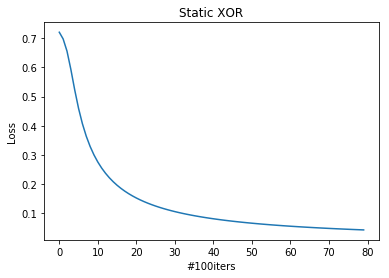

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(avg_losses)
plt.title("Static XOR")
plt.xlabel("#100iters")
plt.ylabel("Loss")
plt.show()

### B. DYNAMIC NETWORKS

In [112]:
from dynet import *
from itertools import product
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
# Create data

vals = [0,1]
def create_xor_instances(num_rounds=2000):
    questions = []
    answers = []
    for _ in xrange(num_rounds):
        for x1,x2 in product(vals, vals):
            answer = 0 if x1==x2 else 1
            questions.append((x1,x2))
            answers.append(answer)
    return questions, answers

X_train, y_train = create_xor_instances()

# Create network dynamically

def create_xor_network(pW, pV, pb, X_train, y_train):
    renew_cg()
    W = parameter(pW) 
    V = parameter(pV)
    b = parameter(pb)
    x = vecInput(len(X_train))
    x.set(X_train)
    y = scalarInput(y_train)
    output = logistic(V*(tanh((W*x)+b)))
    loss =  binary_log_loss(output, y)
    return loss

# Set params

m2 = ParameterCollection()
pW = m2.add_parameters((8,2))
pV = m2.add_parameters((1,8))
pb = m2.add_parameters((8))
trainer = SimpleSGDTrainer(m2)

# Train

seen_instances = 0
total_loss = 0
avg_losses = []
for X_i,y_i in zip(X_train,y_train):
    loss = create_xor_network(pW, pV, pb, X_i, y_i)
    seen_instances += 1
    total_loss += loss.value()
    loss.backward()
    trainer.update()
    if (seen_instances > 1 and seen_instances % 100 == 0):
        avg_loss = total_loss / seen_instances
        avg_losses.append(avg_loss)
        print "average loss is:", avg_loss

# Test       

W = parameter(pW) 
V = parameter(pV)
b = parameter(pb)
x = vecInput(2)
output = logistic(V*(tanh((W*x)+b)))
print
print "Test results"
x.set([0,1])
print "0,1", output.value()
x.set([1,0])
print "1,0", output.value()
x.set([0,0])
print "0,0", output.value()
x.set([1,1])
print "1,1", output.value()

average loss is: 0.752134788036
average loss is: 0.737397335172
average loss is: 0.725410375396
average loss is: 0.704652427137
average loss is: 0.660070686638
average loss is: 0.597163186744
average loss is: 0.535364472408
average loss is: 0.481906592813
average loss is: 0.436995918875
average loss is: 0.39928848009
average loss is: 0.367386082101
average loss is: 0.340131206056
average loss is: 0.316617591948
average loss is: 0.296144262494
average loss is: 0.278167582033
average loss is: 0.262262479412
average loss is: 0.248093210172
average loss is: 0.235391770889
average loss is: 0.223942008297
average loss is: 0.213567864006
average loss is: 0.204124606276
average loss is: 0.195492229276
average loss is: 0.187570429088
average loss is: 0.180274746849
average loss is: 0.173533572807
average loss is: 0.167285804526
average loss is: 0.161478992104
average loss is: 0.156067864394
average loss is: 0.151013143858
average loss is: 0.14628058757
average loss is: 0.141840206198
average lo

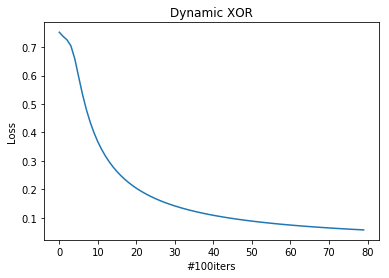

In [113]:
plt.plot(avg_losses)
plt.title("Dynamic XOR")
plt.xlabel("#100iters")
plt.ylabel("Loss")
plt.show()